In [1]:
import pandas as pd
from _config import PKL_PROCESSED_STEP1_DTU_SOLAR_STATION

df = pd.read_pickle(PKL_PROCESSED_STEP1_DTU_SOLAR_STATION)
df = df[sorted(df.columns)]

print(df.shape)
print(df.info())
df.head()

(2460742, 10)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2460742 entries, 2015-03-12 05:36:00 to 2025-01-01 08:04:00
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DHI                float64
 1   DNI                float64
 2   air_pressure       float64
 3   air_temperature    float64
 4   rain_duration      float64
 5   rain_intensity     float64
 6   relative_humidity  float64
 7   solar_altitude     float64
 8   wind_dir_avg       float64
 9   wind_speed_avg     float64
dtypes: float64(10)
memory usage: 206.5 MB
None


,DHI,DNI,air_pressure,air_temperature,rain_duration,rain_intensity,relative_humidity,solar_altitude,wind_dir_avg,wind_speed_avg
2015-03-12 05:36:00,2.890,0.000000,1028.0,0.0,0.0,0.0,81.6,0.004880,85.0,1.0
2015-03-12 05:37:00,3.128,0.000000,1028.0,0.0,0.0,0.0,81.9,0.120481,121.0,0.3
2015-03-12 05:38:00,3.307,0.814740,1028.0,0.0,0.0,0.0,81.7,0.237359,342.0,0.7
2015-03-12 05:39:00,3.657,26.392772,1028.0,0.0,0.0,0.0,81.6,0.355447,342.0,0.7
2015-03-12 05:40:00,4.056,61.929423,1028.0,0.0,0.0,0.0,81.5,0.474681,302.0,1.2


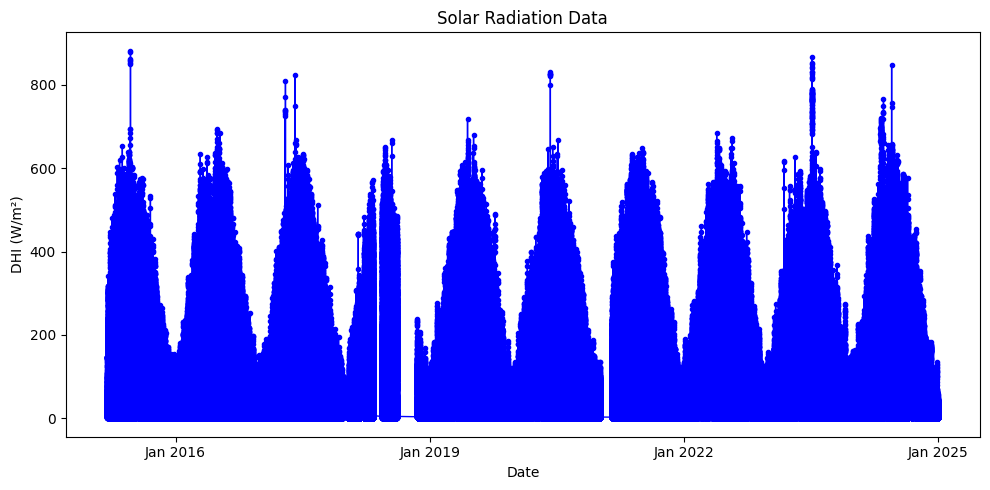

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import numpy as np

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(
    df.index,
    df["DHI"],
    color="blue",
    marker="o",
    linewidth=1,
    markersize=3,
)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(base=3))           # Every 3 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))           # Show only the year

plt.title("Solar Radiation Data")
plt.xlabel("Date")
plt.ylabel("DHI (W/m²)")
plt.tight_layout()
plt.show()


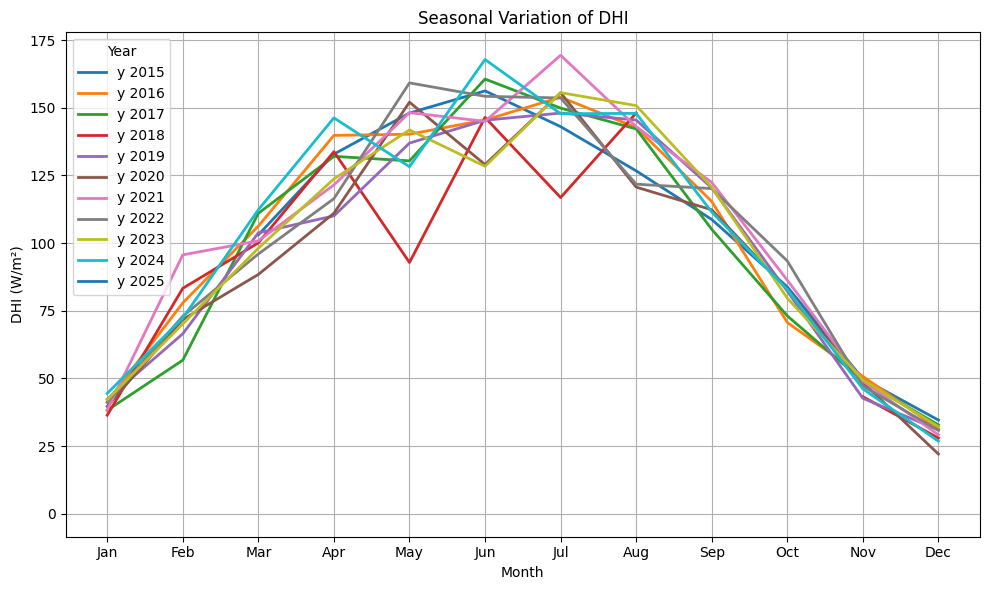

In [3]:
# Extract Year and Month Number
df["Year"] = df.index.year.values
df["Month"] = df.index.month.values

# Pivot to get seasonal matrix: rows = months, columns = years
seasonal_df = df.pivot_table(index="Month", columns="Year", values="DHI", aggfunc='mean')


# Prepare plot
plt.figure(figsize=(10, 6))
years = seasonal_df.columns.tolist()

# Plot each year as a line (like y_seasonal')
for i, year in enumerate(years):
    plt.plot(seasonal_df.index, seasonal_df[year], label=f"y {year}", linewidth=2)

# Formatting
plt.xlabel("Month")
plt.ylabel("DHI (W/m²)")
plt.title("Seasonal Variation of DHI")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year", loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

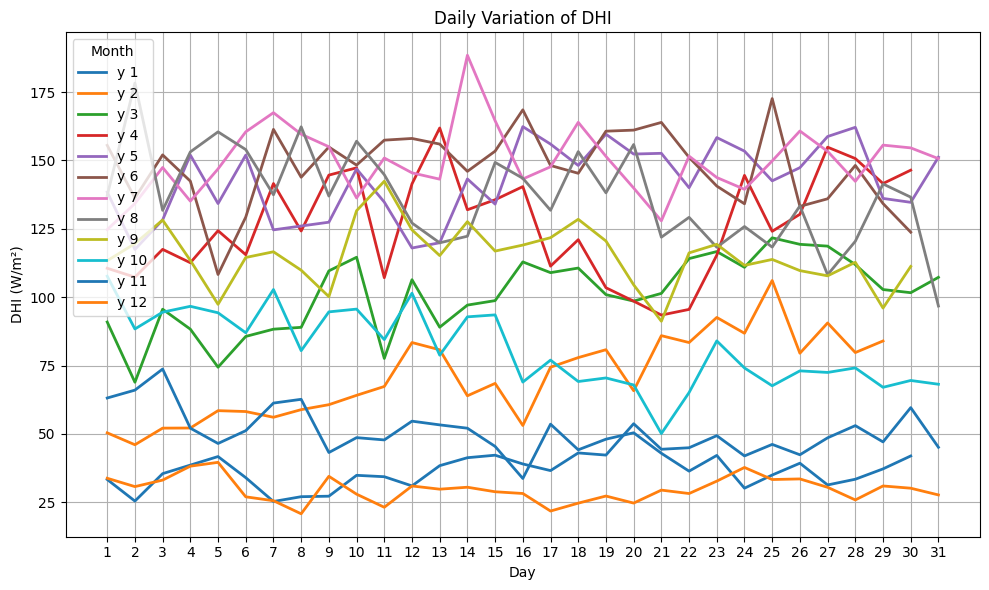

In [4]:
df["Year"] = df.index.year.values
df["Month"] = df.index.month.values
df["Day"] = df.index.day.values

# Pivot to get seasonal matrix: rows = months, columns = years
daily_df = df.pivot_table(index="Day", columns="Month", values="DHI", aggfunc='mean')


# Prepare plot
plt.figure(figsize=(10, 6))
months = daily_df.columns.tolist()

# Plot each month as a line (like y_seasonal')
for i, month in enumerate(months):
    plt.plot(daily_df.index, daily_df[month], label=f"y {month}", linewidth=2)

# Formatting
plt.xlabel("Day")
plt.ylabel("DHI (W/m²)")
plt.title("Daily Variation of DHI")
plt.xticks(ticks=range(1, 32), labels=[str(i) for i in range(1, 32)])
plt.legend(title="Month", loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

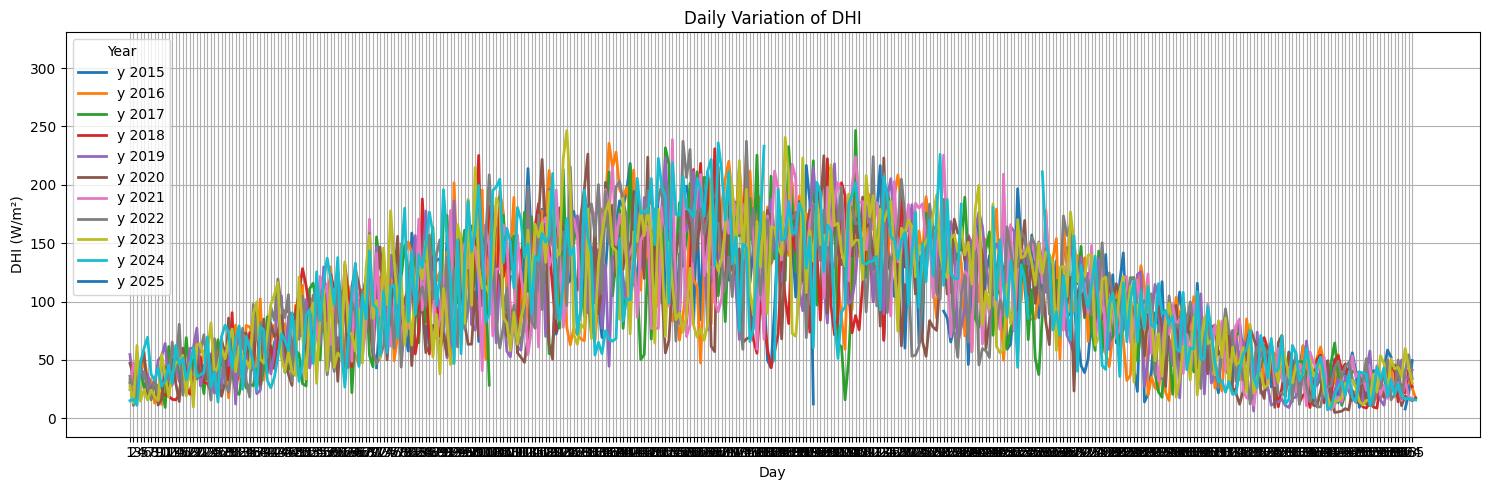

In [5]:
# Daily variation of DHI over days 1-365
df["Day_Num"] = df.index.dayofyear.values
daily_df = df.pivot_table(index="Day_Num", columns="Year", values="DHI", aggfunc='mean')

# Prepare plot
plt.figure(figsize=(15, 5))
months = daily_df.columns.tolist()

# Plot each month as a line (like y_seasonal')
for i, month in enumerate(months):
    plt.plot(daily_df.index, daily_df[month], label=f"y {month}", linewidth=2)

# Formatting
plt.xlabel("Day")
plt.ylabel("DHI (W/m²)")
plt.title("Daily Variation of DHI")
plt.xticks(ticks=range(1, 366), labels=[str(i) for i in range(1, 366)])
plt.legend(title="Year", loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

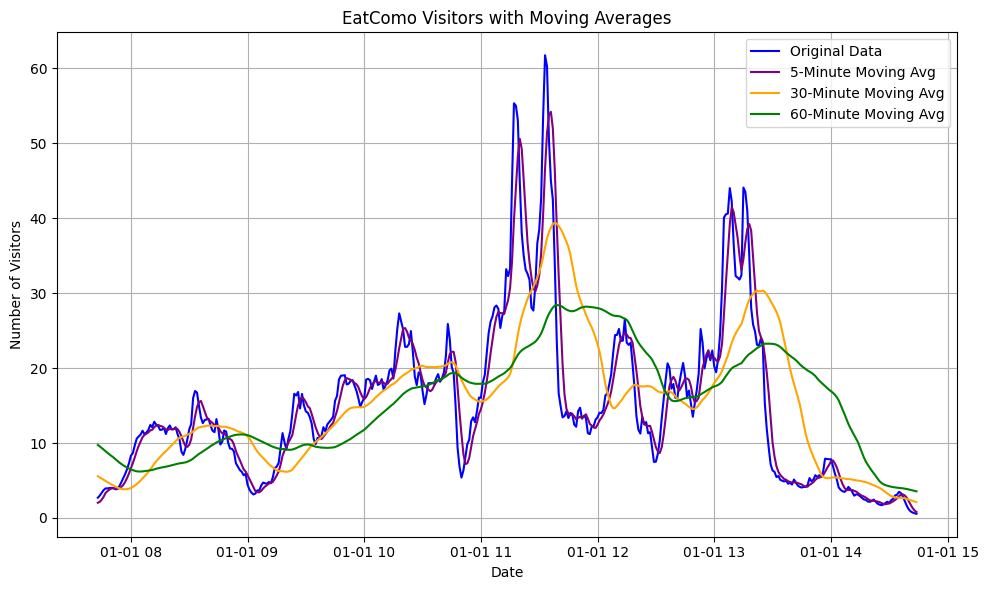

In [6]:
# Calculate moving averages
df["MA_5"] = df["DHI"].rolling(window=5).mean()
df["MA_30"] = df["DHI"].rolling(window=30).mean()
df["MA_60"] = df["DHI"].rolling(window=60).mean()

df_sub = df.loc["2024-01-01":"2024-01-01"].copy()
# Plot original data and moving averages
plt.figure(figsize=(10, 6))
plt.plot(df_sub.index, df_sub["DHI"], label="Original Data", color="blue")
plt.plot(df_sub.index, df_sub["MA_5"], label="5-Minute Moving Avg", color="Purple")
plt.plot(df_sub.index, df_sub["MA_30"], label="30-Minute Moving Avg", color="orange")
plt.plot(df_sub.index, df_sub["MA_60"], label="60-Minute Moving Avg", color="green")

# Format plot
plt.xlabel("Date")
plt.ylabel("Number of Visitors")
plt.title("EatComo Visitors with Moving Averages")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
df_raw = df.copy()


In [8]:
df = df_raw.copy()
df.dropna(inplace=True)
df_train, df_test = df.loc[:"2022"], df.loc["2023":]
df_train.shape, df_test.shape

((1938689, 17), (521994, 17))

In [9]:
train_series = df_train["DHI"].values
test_data = df_test["DHI"].values

In [10]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# sarima_model_custom = SARIMAX(
#     df_train["DHI"],
#     order=(2, 0, 0),
#     enforce_stationarity=False,
#     enforce_invertibility=False
# ).fit()

# print(sarima_model_custom.summary())

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Fit an AutoRegressive model with lag = 60 (i.e., past hour)
model = AutoReg(train_series, lags=60, old_names=False)
model_fit = model.fit()

# Summary
print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:              1938689
Model:                    AutoReg(60)   Log Likelihood            -7331576.614
Method:               Conditional MLE   S.D. of innovations             10.622
Date:                Sun, 25 May 2025   AIC                       14663277.229
Time:                        11:04:16   BIC                       14664050.833
Sample:                            60   HQIC                      14663484.631
                              1938689                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5197      0.012     43.828      0.000       0.496       0.543
y.L1           1.3919      0.001   1938.015      0.000       1.390       1.393
y.L2          -0.5236      0.001   -425.366      0.0

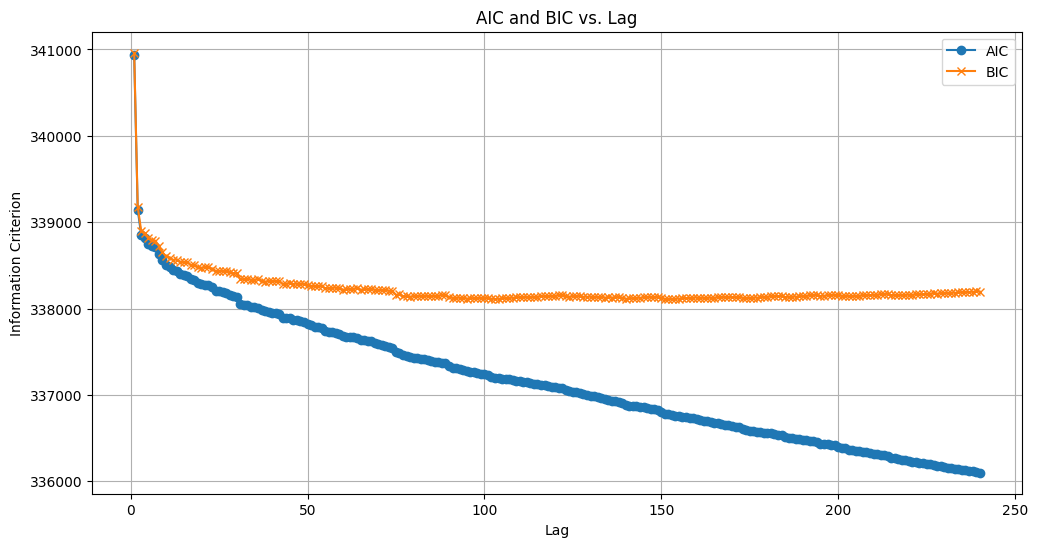

Best lag by AIC: 240
Best lag by BIC: 153


In [12]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Use a smaller subset of the training data if needed
# Example: first 30 days (1-minute resolution = 43200 points)
y = pd.Series(train_series[:43200])


# Try lags from 1 to 120 (2 hours)
max_lag = 240
aic_values = []
bic_values = []
lags = list(range(1, max_lag + 1))

for lag in lags:
    try:
        model = AutoReg(y, lags=lag, old_names=False)
        result = model.fit()
        aic_values.append(result.aic)
        bic_values.append(result.bic)
    except Exception as e:
        # In case of fitting failure (can happen if lag too large)
        aic_values.append(np.nan)
        bic_values.append(np.nan)
        print(f"Failed for lag {lag}: {e}")

# Plotting AIC and BIC
plt.figure(figsize=(12, 6))
plt.plot(lags, aic_values, marker='o', label='AIC')
plt.plot(lags, bic_values, marker='x', label='BIC')
plt.xlabel('Lag')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC vs. Lag')
plt.legend()
plt.grid(True)
plt.show()

# Best lag based on min AIC/BIC
best_aic_lag = lags[np.nanargmin(aic_values)]
best_bic_lag = lags[np.nanargmin(bic_values)]

print(f"Best lag by AIC: {best_aic_lag}")
print(f"Best lag by BIC: {best_bic_lag}")
